# Miralireza Nabavi 

## Pre-processing

In [47]:
### imports
import numpy as np
import pandas as pd
import math
import scipy as sp
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

import warnings
warnings.filterwarnings('ignore')

In [48]:
cd = pd.read_csv("usedcars.csv")
cd.head(10)

,price,trim,isOneOwner,mileage,year,color,displacement,fuel,region,soundSystem,wheelType
0,2988,320,f,193296.0,1995,Black,3.2,Gasoline,SoA,unsp,Alloy
1,6595,320,f,129948.0,1995,other,3.2,Gasoline,Mid,Premium,Alloy
2,7993,320,f,140428.0,1997,White,3.2,Gasoline,Mid,Bose,Alloy
3,5995,420,f,113622.0,1999,Silver,4.2,Gasoline,Mid,unsp,Alloy
4,3000,420,f,167673.0,1999,Silver,4.2,Gasoline,SoA,unsp,Alloy
5,7400,430,f,82419.0,2002,White,4.3,Gasoline,Mid,Bose,Alloy
6,10850,430,f,101264.0,2000,White,4.3,Gasoline,SoA,unsp,unsp
7,8990,430,f,110651.0,2001,Black,4.3,Gasoline,SoA,unsp,Alloy
8,7950,430,f,108173.0,2000,Silver,4.3,Gasoline,ESC,Bose,unsp
9,7995,430,f,119978.0,2000,Black,4.3,Gasoline,ESC,unsp,Alloy


In [49]:
cd.shape

(20063, 11)

# Mileage only

In [50]:
X = cd[['mileage']].to_numpy()
X = X.astype('float64')
print(X.shape)

Y = cd['price'].to_numpy()
Y = Y.astype('float64') / 1000
Y[0:5]

## scale
from sklearn.preprocessing import StandardScaler

scl = StandardScaler()
X = scl.fit_transform(X)
print("means should be 0, sds should be 1")
print(X.mean(axis=0))
print(X.std(axis=0))

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train.shape

(20063, 1)
means should be 0, sds should be 1
[1.26079457e-16]
[1.]


(16050, 1)

## Linear regression

In [51]:
from sklearn.linear_model import LinearRegression

## simple regression
lmod = LinearRegression()
lmod.fit(X_train,y_train)

yhat_linear = lmod.predict(X_test)

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('r2 score on the test set for linear regression is ',r2_score(y_test,yhat_linear))
print('RMSE on the test set for linear regression is ',mean_squared_error(y_test,yhat_linear))

r2 score on the test set for linear regression is  0.6376726498871859
RMSE on the test set for linear regression is  118.29085754683014


## Decision Tree

In [52]:
##sklearn model selection
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor 

tmod = DecisionTreeRegressor() # Let's do GridSearchCV for this model

# hyperparamter values to try in the gid search
param_grid={'criterion' : ('squared_error', 'friedman_mse', 'absolute_error', 'poisson'), 'max_leaf_nodes': [10,20,30,40,50,60,70,80], 'max_features' : ('auto', 'log2', 'sqrt')}
#, 'max_leaf_nodes': [100,150,160,170,180,190,200,210]

# grid  is the grid searh object
grid = GridSearchCV(tmod,param_grid,cv=10,scoring='neg_mean_squared_error',n_jobs = 28)

# now run the grid search
grid.fit(X_train,y_train)

grid.best_params_ #best value from grid
grid.best_index_ # index of best value from grid
#check
print(grid.best_params_)

{'criterion': 'friedman_mse', 'max_features': 'auto', 'max_leaf_nodes': 30}


In [53]:
tmod = DecisionTreeRegressor(criterion = grid.best_params_['criterion'], 
                             max_leaf_nodes = grid.best_params_['max_leaf_nodes'],
                             max_features = grid.best_params_['max_features'])
tmod.fit(X_train,y_train)

#fitted values
yhat_DT = tmod.predict(X_test)

print('r2 score is for decision tree model is ',r2_score(y_test,yhat_DT))
print('RMSE on the test set for decision tree model is ',mean_squared_error(y_test,yhat_DT))

r2 score is for decision tree model is  0.7334560336171733
RMSE on the test set for decision tree model is  87.01996784824816


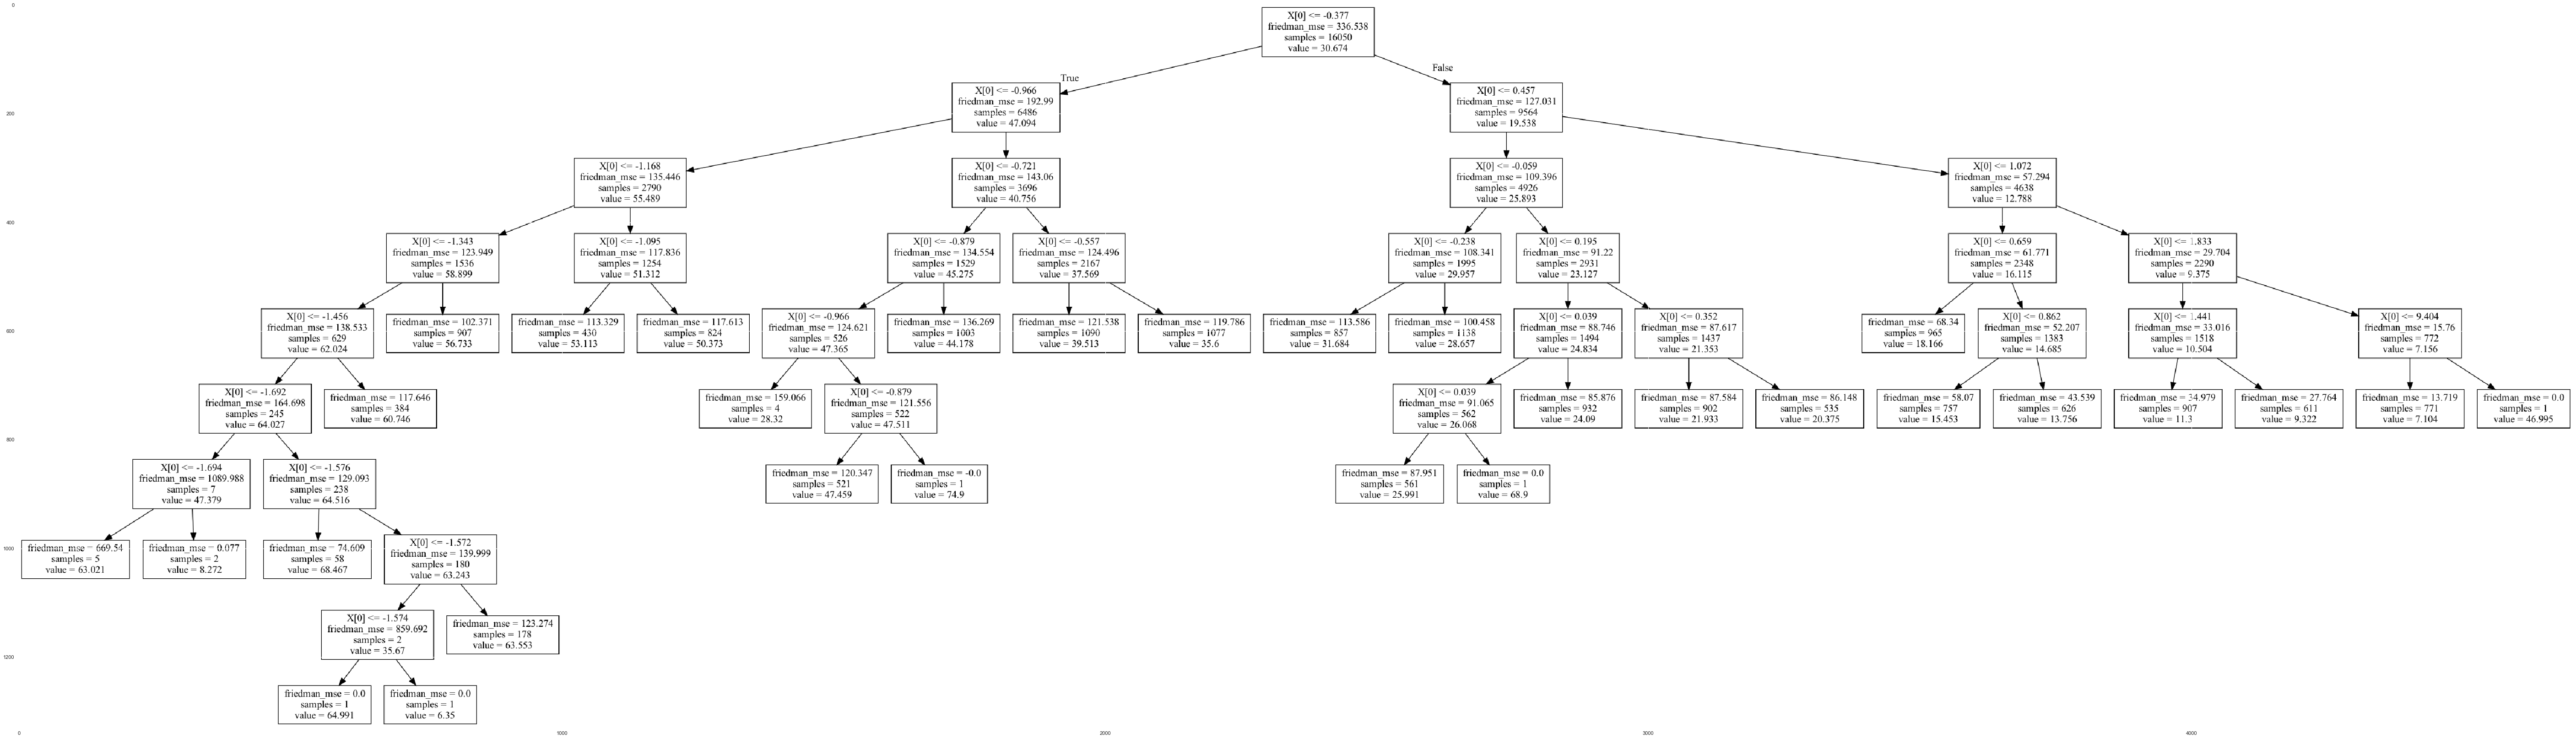

In [54]:
### plot a tree
import matplotlib.image as mpimg
import pydotplus
from sklearn import tree
import os

dot_data = tree.export_graphviz(tmod,out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png("tree.png") #write graph to file
## the picture is now in the file tree.png
os.system('eog tree.png') #display file from python command line, unix command eog
img = mpimg.imread("tree.png")
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

## Random Forest 

In [55]:
from sklearn.ensemble import RandomForestRegressor

rfmod = RandomForestRegressor(random_state=0,n_jobs=-1)

# hyperparamter values to try in the gid search
#param_grid={'n_estimators': [500,600,700,800,900,1000]}
param_grid={'n_estimators': [100,200,300,400,500]}
#param_grid={'n_estimators': [10,20,30,40,50]}
#'criterion' : ('squared_error', 'absolute_error', 'poisson')

# grid  is the grid searh object
grid = GridSearchCV(rfmod,param_grid,cv=10,scoring='neg_mean_squared_error',n_jobs = 28)

# now run the grid search
grid.fit(X_train,y_train)

grid.best_params_ #best value from grid
grid.best_index_ # index of best value from grid
#check
print(grid.best_params_)

{'n_estimators': 300}


In [56]:
rfmod = RandomForestRegressor(random_state=0,n_jobs=-1, n_estimators = grid.best_params_['n_estimators'])

rfmod.fit(X_train,y_train)

#fitted values
yhat_RF = rfmod.predict(X_test)

print('r2 score is for random forest model is ',r2_score(y_test,yhat_RF))
print('RMSE on the test for random forest model is ',mean_squared_error(y_test,yhat_RF))

r2 score is for random forest model is  0.6124949197639271
RMSE on the test for random forest model is  126.51075948477552


## Boosting

In [57]:
from sklearn.ensemble import GradientBoostingRegressor

#gbm = GradientBoostingRegressor(learning_rate=.05,n_estimators=400,max_depth=5)
gbm = GradientBoostingRegressor(learning_rate=.01)

# hyperparamter values to try in the gid search
param_grid={'n_estimators' : [10,50,100,200,300,400,500], 'max_depth': [3,4,5,6,7]}

# grid  is the grid searh object
grid = GridSearchCV(gbm,param_grid,cv=10,scoring='neg_mean_squared_error',n_jobs = 28)

grid.fit(X_train,y_train)

grid.best_params_ #best value from grid
grid.best_index_ # index of best value from grid
#check
print(grid.best_params_)

{'max_depth': 3, 'n_estimators': 500}


In [58]:
gbm = GradientBoostingRegressor(learning_rate=.05,n_estimators=grid.best_params_['n_estimators'],max_depth=grid.best_params_['max_depth'])

gbm.fit(X_train,y_train)

yhat_GB = gbm.predict(X_test)

print('r2 score is for GB model is ',r2_score(y_test,yhat_GB))
print('RMSE on the test for GB model is ',mean_squared_error(y_test,yhat_GB))

r2 score is for GB model is  0.7336888839644338
RMSE on the test for GB model is  86.94394800804302


# Mileage and year

In [59]:
X = cd[['mileage','year']].to_numpy()
X = X.astype('float64')
print(X.shape)

Y = cd['price'].to_numpy()
Y = Y.astype('float64') / 1000
Y[0:5]

## scale
from sklearn.preprocessing import StandardScaler

scl = StandardScaler()
X = scl.fit_transform(X)
print("means should be 0, sds should be 1")
print(X.mean(axis=0))
print(X.std(axis=0))

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train.shape

(20063, 2)
means should be 0, sds should be 1
[1.26079457e-16 7.34235757e-15]
[1. 1.]


(16050, 2)

## Linear regression

In [60]:
from sklearn.linear_model import LinearRegression

## simple regression
lmod = LinearRegression()
lmod.fit(X_train,y_train)

yhat_linear = lmod.predict(X_test)

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('r2 score on the test for linear regression is ',r2_score(y_test,yhat_linear))
print('RMSE on the test for linear regression is ',mean_squared_error(y_test,yhat_linear))

r2 score on the test for linear regression is  0.8328852693846458
RMSE on the test for linear regression is  54.55879824430241


## Decision Tree

In [61]:
tmod = DecisionTreeRegressor() # Let's do GridSearchCV for this model

# hyperparamter values to try in the gid search
param_grid={'criterion' : ('squared_error', 'friedman_mse', 'absolute_error', 'poisson'), 'max_leaf_nodes': [10,20,30,40,50,60,70,80], 'max_features' : ('auto', 'log2', 'sqrt')}

# grid  is the grid searh object
grid = GridSearchCV(tmod,param_grid,cv=10,scoring='neg_mean_squared_error',n_jobs = 28)

# now run the grid search
grid.fit(X_train,y_train)

grid.best_params_ #best value from grid
grid.best_index_ # index of best value from grid
#check
print(grid.best_params_)

{'criterion': 'friedman_mse', 'max_features': 'auto', 'max_leaf_nodes': 80}


In [62]:
tmod = DecisionTreeRegressor(criterion = grid.best_params_['criterion'], 
                             max_leaf_nodes = grid.best_params_['max_leaf_nodes'],
                             max_features = grid.best_params_['max_features'])
tmod.fit(X_train,y_train)

#fitted values
yhat_DT = tmod.predict(X_test)

print('r2 score is for decision tree model is ',r2_score(y_test,yhat_DT))
print('RMSE on the test for DT is ',mean_squared_error(y_test,yhat_DT))

r2 score is for decision tree model is  0.9126795394805198
RMSE on the test for DT is  28.507956004473105


## Random Forest

In [63]:
rfmod = RandomForestRegressor(random_state=0,n_jobs=-1)

# hyperparamter values to try in the gid search
#param_grid={'n_estimators': [500,600,700,800,900,1000]}
param_grid={'n_estimators': [100,200,300,400,500]}
#param_grid={'n_estimators': [10,20,30,40,50]}
#'criterion' : ('squared_error', 'absolute_error', 'poisson')

# grid  is the grid searh object
grid = GridSearchCV(rfmod,param_grid,cv=10,scoring='neg_mean_squared_error',n_jobs = 28)

# now run the grid search
grid.fit(X_train,y_train)

grid.best_params_ #best value from grid
grid.best_index_ # index of best value from grid
#check
print(grid.best_params_)

{'n_estimators': 400}


In [64]:
rfmod = RandomForestRegressor(random_state=0,n_jobs=-1, n_estimators = grid.best_params_['n_estimators'])

rfmod.fit(X_train,y_train)

#fitted values
yhat_RF = rfmod.predict(X_test)

print('r2 score is for random forest model is ',r2_score(y_test,yhat_RF))
print('RMSE on the test for random forest model is ',mean_squared_error(y_test,yhat_RF))

r2 score is for random forest model is  0.8769142967405938
RMSE on the test for random forest model is  40.18441717352125


## Boosting

In [65]:
from sklearn.ensemble import GradientBoostingRegressor

#gbm = GradientBoostingRegressor(learning_rate=.05,n_estimators=400,max_depth=5)
gbm = GradientBoostingRegressor(learning_rate=.01)

# hyperparamter values to try in the gid search
param_grid={'n_estimators' : [10,50,100,200,300,400,500], 'max_depth': [3,4,5,6,7]}

# grid  is the grid searh object
grid = GridSearchCV(gbm,param_grid,cv=10,scoring='neg_mean_squared_error',n_jobs = 28)

grid.fit(X_train,y_train)

grid.best_params_ #best value from grid
grid.best_index_ # index of best value from grid
#check
print(grid.best_params_)

{'max_depth': 4, 'n_estimators': 500}


In [66]:
gbm = GradientBoostingRegressor(learning_rate=.05,n_estimators=grid.best_params_['n_estimators'],max_depth=grid.best_params_['max_depth'])

gbm.fit(X_train,y_train)

yhat_GB = gbm.predict(X_test)

print('r2 score is for GB model is ',r2_score(y_test,yhat_GB))
print('RMSE on the test for GB model is ',mean_squared_error(y_test,yhat_GB))

r2 score is for GB model is  0.9187703072798874
RMSE on the test for GB model is  26.519471983375972


# Mileage only

In [67]:
X = cd[['mileage']].to_numpy()
X = X.astype('float64')
print(X.shape)

Y = cd['price'].to_numpy()
Y = Y.astype('float64') / 1000
Y[0:5]

## scale
from sklearn.preprocessing import StandardScaler

scl = StandardScaler()
X = scl.fit_transform(X)
print("means should be 0, sds should be 1")
print(X.mean(axis=0))
print(X.std(axis=0))

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train.shape

(20063, 1)
means should be 0, sds should be 1
[1.26079457e-16]
[1.]


(16050, 1)

## Neural Network

Epoch 1/1000
17/17 - 0s - loss: 1277.8511 - mse: 1277.8511 - val_loss: 1280.8107 - val_mse: 1280.8107
Epoch 2/1000
17/17 - 0s - loss: 1260.6510 - mse: 1260.6510 - val_loss: 1263.4777 - val_mse: 1263.4777
Epoch 3/1000
17/17 - 0s - loss: 1243.2651 - mse: 1243.2651 - val_loss: 1245.1196 - val_mse: 1245.1196
Epoch 4/1000
17/17 - 0s - loss: 1224.3273 - mse: 1224.3273 - val_loss: 1224.8560 - val_mse: 1224.8560
Epoch 5/1000
17/17 - 0s - loss: 1203.0973 - mse: 1203.0973 - val_loss: 1201.6537 - val_mse: 1201.6537
Epoch 6/1000
17/17 - 0s - loss: 1178.5587 - mse: 1178.5587 - val_loss: 1174.5981 - val_mse: 1174.5981
Epoch 7/1000
17/17 - 0s - loss: 1149.8132 - mse: 1149.8132 - val_loss: 1143.0179 - val_mse: 1143.0179
Epoch 8/1000
17/17 - 0s - loss: 1116.6085 - mse: 1116.6085 - val_loss: 1106.1876 - val_mse: 1106.1876
Epoch 9/1000
17/17 - 0s - loss: 1078.1084 - mse: 1078.1084 - val_loss: 1064.2787 - val_mse: 1064.2787
Epoch 10/1000
17/17 - 0s - loss: 1034.6021 - mse: 1034.6021 - val_loss: 1017.4691 

Epoch 86/1000
17/17 - 0s - loss: 93.3900 - mse: 93.3900 - val_loss: 87.6995 - val_mse: 87.6995
Epoch 87/1000
17/17 - 0s - loss: 93.3717 - mse: 93.3717 - val_loss: 87.6810 - val_mse: 87.6810
Epoch 88/1000
17/17 - 0s - loss: 93.3549 - mse: 93.3549 - val_loss: 87.6655 - val_mse: 87.6655
Epoch 89/1000
17/17 - 0s - loss: 93.3350 - mse: 93.3350 - val_loss: 87.6484 - val_mse: 87.6484
Epoch 90/1000
17/17 - 0s - loss: 93.3175 - mse: 93.3175 - val_loss: 87.6275 - val_mse: 87.6275
Epoch 91/1000
17/17 - 0s - loss: 93.3011 - mse: 93.3011 - val_loss: 87.6168 - val_mse: 87.6168
Epoch 92/1000
17/17 - 0s - loss: 93.2831 - mse: 93.2831 - val_loss: 87.6125 - val_mse: 87.6125
Epoch 93/1000
17/17 - 0s - loss: 93.2691 - mse: 93.2691 - val_loss: 87.6042 - val_mse: 87.6042
Epoch 94/1000
17/17 - 0s - loss: 93.2544 - mse: 93.2544 - val_loss: 87.5788 - val_mse: 87.5788
Epoch 95/1000
17/17 - 0s - loss: 93.2369 - mse: 93.2369 - val_loss: 87.5670 - val_mse: 87.5670
Epoch 96/1000
17/17 - 0s - loss: 93.2181 - mse: 93

Epoch 172/1000
17/17 - 0s - loss: 91.7205 - mse: 91.7205 - val_loss: 86.0949 - val_mse: 86.0949
Epoch 173/1000
17/17 - 0s - loss: 91.7057 - mse: 91.7057 - val_loss: 86.0256 - val_mse: 86.0256
Epoch 174/1000
17/17 - 0s - loss: 91.6889 - mse: 91.6889 - val_loss: 86.0058 - val_mse: 86.0058
Epoch 175/1000
17/17 - 0s - loss: 91.6722 - mse: 91.6722 - val_loss: 85.9961 - val_mse: 85.9961
Epoch 176/1000
17/17 - 0s - loss: 91.6506 - mse: 91.6506 - val_loss: 86.0140 - val_mse: 86.0140
Epoch 177/1000
17/17 - 0s - loss: 91.6523 - mse: 91.6523 - val_loss: 85.9977 - val_mse: 85.9977
Epoch 178/1000
17/17 - 0s - loss: 91.6296 - mse: 91.6296 - val_loss: 86.0007 - val_mse: 86.0007
Epoch 179/1000
17/17 - 0s - loss: 91.6365 - mse: 91.6365 - val_loss: 86.0093 - val_mse: 86.0093
Epoch 180/1000
17/17 - 0s - loss: 91.6049 - mse: 91.6049 - val_loss: 85.9550 - val_mse: 85.9550
Epoch 181/1000
17/17 - 0s - loss: 91.5917 - mse: 91.5917 - val_loss: 85.9447 - val_mse: 85.9447
Epoch 182/1000
17/17 - 0s - loss: 91.579

Epoch 258/1000
17/17 - 0s - loss: 91.1581 - mse: 91.1581 - val_loss: 85.4813 - val_mse: 85.4813
Epoch 259/1000
17/17 - 0s - loss: 91.1616 - mse: 91.1616 - val_loss: 85.4818 - val_mse: 85.4818
Epoch 260/1000
17/17 - 0s - loss: 91.1455 - mse: 91.1455 - val_loss: 85.4726 - val_mse: 85.4726
Epoch 261/1000
17/17 - 0s - loss: 91.1361 - mse: 91.1361 - val_loss: 85.4747 - val_mse: 85.4747
Epoch 262/1000
17/17 - 0s - loss: 91.1411 - mse: 91.1411 - val_loss: 85.4985 - val_mse: 85.4985
Epoch 263/1000
17/17 - 0s - loss: 91.1262 - mse: 91.1262 - val_loss: 85.4583 - val_mse: 85.4583
Epoch 264/1000
17/17 - 0s - loss: 91.1307 - mse: 91.1307 - val_loss: 85.4522 - val_mse: 85.4522
Epoch 265/1000
17/17 - 0s - loss: 91.1355 - mse: 91.1355 - val_loss: 85.4518 - val_mse: 85.4518
Epoch 266/1000
17/17 - 0s - loss: 91.1302 - mse: 91.1302 - val_loss: 85.4576 - val_mse: 85.4576
Epoch 267/1000
17/17 - 0s - loss: 91.1221 - mse: 91.1221 - val_loss: 85.4590 - val_mse: 85.4590
Epoch 268/1000
17/17 - 0s - loss: 91.119

Epoch 344/1000
17/17 - 0s - loss: 91.1310 - mse: 91.1310 - val_loss: 85.4537 - val_mse: 85.4537
Epoch 345/1000
17/17 - 0s - loss: 91.0670 - mse: 91.0670 - val_loss: 85.3157 - val_mse: 85.3157
Epoch 346/1000
17/17 - 0s - loss: 91.0630 - mse: 91.0630 - val_loss: 85.3087 - val_mse: 85.3087
Epoch 347/1000
17/17 - 0s - loss: 91.0334 - mse: 91.0334 - val_loss: 85.3215 - val_mse: 85.3215
Epoch 348/1000
17/17 - 0s - loss: 91.1095 - mse: 91.1095 - val_loss: 85.4075 - val_mse: 85.4075
Epoch 349/1000
17/17 - 0s - loss: 91.0526 - mse: 91.0526 - val_loss: 85.3079 - val_mse: 85.3079
Epoch 350/1000
17/17 - 0s - loss: 91.0303 - mse: 91.0303 - val_loss: 85.3433 - val_mse: 85.3433
Epoch 351/1000
17/17 - 0s - loss: 91.0663 - mse: 91.0663 - val_loss: 85.3628 - val_mse: 85.3628
Epoch 352/1000
17/17 - 0s - loss: 91.0328 - mse: 91.0328 - val_loss: 85.3283 - val_mse: 85.3283
Epoch 353/1000
17/17 - 0s - loss: 91.0343 - mse: 91.0343 - val_loss: 85.3216 - val_mse: 85.3216
Epoch 354/1000
17/17 - 0s - loss: 91.029

Epoch 430/1000
17/17 - 0s - loss: 91.0458 - mse: 91.0458 - val_loss: 85.3118 - val_mse: 85.3118
Epoch 431/1000
17/17 - 0s - loss: 91.0600 - mse: 91.0600 - val_loss: 85.3151 - val_mse: 85.3151
Epoch 432/1000
17/17 - 0s - loss: 91.0642 - mse: 91.0642 - val_loss: 85.3107 - val_mse: 85.3107
Epoch 433/1000
17/17 - 0s - loss: 91.0369 - mse: 91.0369 - val_loss: 85.3066 - val_mse: 85.3066
Epoch 434/1000
17/17 - 0s - loss: 91.0240 - mse: 91.0240 - val_loss: 85.3345 - val_mse: 85.3345
Epoch 435/1000
17/17 - 0s - loss: 91.0196 - mse: 91.0196 - val_loss: 85.3092 - val_mse: 85.3092
Epoch 436/1000
17/17 - 0s - loss: 91.0208 - mse: 91.0208 - val_loss: 85.2936 - val_mse: 85.2936
Epoch 437/1000
17/17 - 0s - loss: 91.0241 - mse: 91.0241 - val_loss: 85.2819 - val_mse: 85.2819
Epoch 438/1000
17/17 - 0s - loss: 91.0139 - mse: 91.0139 - val_loss: 85.3202 - val_mse: 85.3202
Epoch 439/1000
17/17 - 0s - loss: 91.0302 - mse: 91.0302 - val_loss: 85.3192 - val_mse: 85.3192
Epoch 440/1000
17/17 - 0s - loss: 91.021

Epoch 516/1000
17/17 - 0s - loss: 91.0760 - mse: 91.0760 - val_loss: 85.3961 - val_mse: 85.3961
Epoch 517/1000
17/17 - 0s - loss: 91.0322 - mse: 91.0322 - val_loss: 85.2947 - val_mse: 85.2947
Epoch 518/1000
17/17 - 0s - loss: 91.0140 - mse: 91.0140 - val_loss: 85.2732 - val_mse: 85.2732
Epoch 519/1000
17/17 - 0s - loss: 91.0919 - mse: 91.0919 - val_loss: 85.2805 - val_mse: 85.2805
Epoch 520/1000
17/17 - 0s - loss: 91.0222 - mse: 91.0222 - val_loss: 85.2897 - val_mse: 85.2897
Epoch 521/1000
17/17 - 0s - loss: 91.0210 - mse: 91.0210 - val_loss: 85.2924 - val_mse: 85.2924
Epoch 522/1000
17/17 - 0s - loss: 91.0137 - mse: 91.0137 - val_loss: 85.2945 - val_mse: 85.2945
Epoch 523/1000
17/17 - 0s - loss: 91.0093 - mse: 91.0093 - val_loss: 85.3095 - val_mse: 85.3095
Epoch 524/1000
17/17 - 0s - loss: 91.0137 - mse: 91.0137 - val_loss: 85.3049 - val_mse: 85.3049
Epoch 525/1000
17/17 - 0s - loss: 91.0093 - mse: 91.0093 - val_loss: 85.2874 - val_mse: 85.2874
Epoch 526/1000
17/17 - 0s - loss: 91.021

Epoch 602/1000
17/17 - 0s - loss: 91.0498 - mse: 91.0498 - val_loss: 85.2885 - val_mse: 85.2885
Epoch 603/1000
17/17 - 0s - loss: 91.0178 - mse: 91.0178 - val_loss: 85.2823 - val_mse: 85.2823
Epoch 604/1000
17/17 - 0s - loss: 91.0464 - mse: 91.0464 - val_loss: 85.3324 - val_mse: 85.3324
Epoch 605/1000
17/17 - 0s - loss: 90.9997 - mse: 90.9997 - val_loss: 85.2846 - val_mse: 85.2846
Epoch 606/1000
17/17 - 0s - loss: 91.0332 - mse: 91.0332 - val_loss: 85.2848 - val_mse: 85.2848
Epoch 607/1000
17/17 - 0s - loss: 91.0149 - mse: 91.0149 - val_loss: 85.3030 - val_mse: 85.3030
Epoch 608/1000
17/17 - 0s - loss: 91.0233 - mse: 91.0233 - val_loss: 85.2834 - val_mse: 85.2834
Epoch 609/1000
17/17 - 0s - loss: 91.0082 - mse: 91.0082 - val_loss: 85.2751 - val_mse: 85.2751
Epoch 610/1000
17/17 - 0s - loss: 91.0172 - mse: 91.0172 - val_loss: 85.2615 - val_mse: 85.2615
Epoch 611/1000
17/17 - 0s - loss: 91.0223 - mse: 91.0223 - val_loss: 85.2685 - val_mse: 85.2685
Epoch 612/1000
17/17 - 0s - loss: 91.054

Epoch 688/1000
17/17 - 0s - loss: 91.0052 - mse: 91.0052 - val_loss: 85.2527 - val_mse: 85.2527
Epoch 689/1000
17/17 - 0s - loss: 91.0022 - mse: 91.0022 - val_loss: 85.2684 - val_mse: 85.2684
Epoch 690/1000
17/17 - 0s - loss: 91.0649 - mse: 91.0649 - val_loss: 85.2596 - val_mse: 85.2596
Epoch 691/1000
17/17 - 0s - loss: 91.0014 - mse: 91.0014 - val_loss: 85.2480 - val_mse: 85.2480
Epoch 692/1000
17/17 - 0s - loss: 90.9971 - mse: 90.9971 - val_loss: 85.2529 - val_mse: 85.2529
Epoch 693/1000
17/17 - 0s - loss: 91.0191 - mse: 91.0191 - val_loss: 85.2546 - val_mse: 85.2546
Epoch 694/1000
17/17 - 0s - loss: 91.0437 - mse: 91.0437 - val_loss: 85.2564 - val_mse: 85.2564
Epoch 695/1000
17/17 - 0s - loss: 91.0153 - mse: 91.0153 - val_loss: 85.2568 - val_mse: 85.2568
Epoch 696/1000
17/17 - 0s - loss: 91.0021 - mse: 91.0021 - val_loss: 85.2612 - val_mse: 85.2612
Epoch 697/1000
17/17 - 0s - loss: 91.0126 - mse: 91.0126 - val_loss: 85.2876 - val_mse: 85.2876
Epoch 698/1000
17/17 - 0s - loss: 91.019

Epoch 774/1000
17/17 - 0s - loss: 90.9802 - mse: 90.9802 - val_loss: 85.2641 - val_mse: 85.2641
Epoch 775/1000
17/17 - 0s - loss: 90.9838 - mse: 90.9838 - val_loss: 85.2615 - val_mse: 85.2615
Epoch 776/1000
17/17 - 0s - loss: 91.0245 - mse: 91.0245 - val_loss: 85.2573 - val_mse: 85.2573
Epoch 777/1000
17/17 - 0s - loss: 91.0634 - mse: 91.0634 - val_loss: 85.2573 - val_mse: 85.2573
Epoch 778/1000
17/17 - 0s - loss: 91.0054 - mse: 91.0054 - val_loss: 85.2569 - val_mse: 85.2569
Epoch 779/1000
17/17 - 0s - loss: 90.9839 - mse: 90.9839 - val_loss: 85.2891 - val_mse: 85.2891
Epoch 780/1000
17/17 - 0s - loss: 90.9887 - mse: 90.9887 - val_loss: 85.2601 - val_mse: 85.2601
Epoch 781/1000
17/17 - 0s - loss: 90.9836 - mse: 90.9836 - val_loss: 85.2715 - val_mse: 85.2715
Epoch 782/1000
17/17 - 0s - loss: 90.9861 - mse: 90.9861 - val_loss: 85.2525 - val_mse: 85.2525
Epoch 783/1000
17/17 - 0s - loss: 90.9815 - mse: 90.9815 - val_loss: 85.2740 - val_mse: 85.2740
Epoch 784/1000
17/17 - 0s - loss: 90.984

Epoch 860/1000
17/17 - 0s - loss: 90.9851 - mse: 90.9851 - val_loss: 85.3065 - val_mse: 85.3065
Epoch 861/1000
17/17 - 0s - loss: 91.0127 - mse: 91.0127 - val_loss: 85.2651 - val_mse: 85.2651
Epoch 862/1000
17/17 - 0s - loss: 90.9802 - mse: 90.9802 - val_loss: 85.2761 - val_mse: 85.2761
Epoch 863/1000
17/17 - 0s - loss: 90.9832 - mse: 90.9832 - val_loss: 85.2657 - val_mse: 85.2657
Epoch 864/1000
17/17 - 0s - loss: 90.9893 - mse: 90.9893 - val_loss: 85.2690 - val_mse: 85.2690
Epoch 865/1000
17/17 - 0s - loss: 90.9962 - mse: 90.9962 - val_loss: 85.2527 - val_mse: 85.2527
Epoch 866/1000
17/17 - 0s - loss: 91.0556 - mse: 91.0556 - val_loss: 85.2521 - val_mse: 85.2521
Epoch 867/1000
17/17 - 0s - loss: 91.0266 - mse: 91.0266 - val_loss: 85.3365 - val_mse: 85.3365
Epoch 868/1000
17/17 - 0s - loss: 91.0252 - mse: 91.0252 - val_loss: 85.2729 - val_mse: 85.2729
Epoch 869/1000
17/17 - 0s - loss: 90.9707 - mse: 90.9707 - val_loss: 85.3023 - val_mse: 85.3023
Epoch 870/1000
17/17 - 0s - loss: 91.038

Epoch 946/1000
17/17 - 0s - loss: 90.9922 - mse: 90.9922 - val_loss: 85.2431 - val_mse: 85.2431
Epoch 947/1000
17/17 - 0s - loss: 90.9895 - mse: 90.9895 - val_loss: 85.2539 - val_mse: 85.2539
Epoch 948/1000
17/17 - 0s - loss: 91.0053 - mse: 91.0053 - val_loss: 85.2734 - val_mse: 85.2734
Epoch 949/1000
17/17 - 0s - loss: 90.9923 - mse: 90.9923 - val_loss: 85.2538 - val_mse: 85.2538
Epoch 950/1000
17/17 - 0s - loss: 91.0000 - mse: 91.0000 - val_loss: 85.2711 - val_mse: 85.2711
Epoch 951/1000
17/17 - 0s - loss: 90.9794 - mse: 90.9794 - val_loss: 85.2743 - val_mse: 85.2743
Epoch 952/1000
17/17 - 0s - loss: 91.0118 - mse: 91.0118 - val_loss: 85.3015 - val_mse: 85.3015
Epoch 953/1000
17/17 - 0s - loss: 91.0037 - mse: 91.0037 - val_loss: 85.2477 - val_mse: 85.2477
Epoch 954/1000
17/17 - 0s - loss: 90.9870 - mse: 90.9870 - val_loss: 85.2577 - val_mse: 85.2577
Epoch 955/1000
17/17 - 0s - loss: 90.9813 - mse: 90.9813 - val_loss: 85.2365 - val_mse: 85.2365
Epoch 956/1000
17/17 - 0s - loss: 90.991

Text(0, 0.5, 'loss')

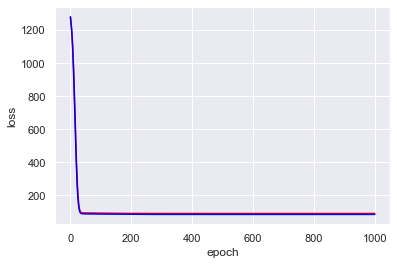

In [68]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout, Dense

#make model
lp2pen = .01
#nx = x_train.shape
nn1 = models.Sequential()
nn1.add(layers.Dense(units=100,activation='relu',input_shape=(X_train.shape[1],)))
#nn1.add(Dropout(0.2))
nn1.add(layers.Dense(units=1))

#compile model
nn1.compile(loss='mse',optimizer='adam',metrics=['mse'])

# fit
nhist = nn1.fit(X_train,y_train,epochs=1000,verbose=2,batch_size=1000,validation_data=(X_test,y_test))

### plot training by epoch
trL = nhist.history['loss']
teL = nhist.history['val_loss']
epind = range(1,len(trL)+1)
plt.plot(epind,trL,c='red')
plt.plot(epind,teL,c='blue')
plt.xlabel('epoch'); plt.ylabel('loss')

In [69]:
nn1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               200       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 101       
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [70]:
yhat_NN = nn1.predict(X_test)

print('r2 score is for NN model is ',r2_score(y_test,yhat_NN))
print('RMSE on the test for NN is ',mean_squared_error(y_test,yhat_NN))

r2 score is for NN model is  0.7388301306000362
RMSE on the test for NN is  85.26545900301534


# Mileage and year

## Neural Network

In [71]:
X = cd[['mileage','year']].to_numpy()
X = X.astype('float64')
print(X.shape)

Y = cd['price'].to_numpy()
Y = Y.astype('float64') / 1000
Y[0:5]

## scale
from sklearn.preprocessing import StandardScaler

scl = StandardScaler()
X = scl.fit_transform(X)
print("means should be 0, sds should be 1")
print(X.mean(axis=0))
print(X.std(axis=0))

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train.shape

(20063, 2)
means should be 0, sds should be 1
[1.26079457e-16 7.34235757e-15]
[1. 1.]


(16050, 2)

Epoch 1/1000
17/17 - 0s - loss: 1276.3005 - mse: 1276.3005 - val_loss: 1277.8367 - val_mse: 1277.8367
Epoch 2/1000
17/17 - 0s - loss: 1256.0940 - mse: 1256.0940 - val_loss: 1256.8053 - val_mse: 1256.8053
Epoch 3/1000
17/17 - 0s - loss: 1234.2537 - mse: 1234.2537 - val_loss: 1232.9337 - val_mse: 1232.9337
Epoch 4/1000
17/17 - 0s - loss: 1208.8904 - mse: 1208.8904 - val_loss: 1204.4724 - val_mse: 1204.4724
Epoch 5/1000
17/17 - 0s - loss: 1178.0947 - mse: 1178.0947 - val_loss: 1169.5857 - val_mse: 1169.5857
Epoch 6/1000
17/17 - 0s - loss: 1140.7217 - mse: 1140.7217 - val_loss: 1127.4833 - val_mse: 1127.4833
Epoch 7/1000
17/17 - 0s - loss: 1096.2889 - mse: 1096.2889 - val_loss: 1078.8914 - val_mse: 1078.8914
Epoch 8/1000
17/17 - 0s - loss: 1045.6897 - mse: 1045.6897 - val_loss: 1023.8973 - val_mse: 1023.8973
Epoch 9/1000
17/17 - 0s - loss: 989.0832 - mse: 989.0831 - val_loss: 963.3846 - val_mse: 963.3846
Epoch 10/1000
17/17 - 0s - loss: 926.9050 - mse: 926.9050 - val_loss: 896.9897 - val_m

17/17 - 0s - loss: 31.8548 - mse: 31.8548 - val_loss: 29.2046 - val_mse: 29.2046
Epoch 87/1000
17/17 - 0s - loss: 31.8457 - mse: 31.8457 - val_loss: 29.1802 - val_mse: 29.1802
Epoch 88/1000
17/17 - 0s - loss: 31.8363 - mse: 31.8363 - val_loss: 29.1527 - val_mse: 29.1527
Epoch 89/1000
17/17 - 0s - loss: 31.8337 - mse: 31.8337 - val_loss: 29.1467 - val_mse: 29.1467
Epoch 90/1000
17/17 - 0s - loss: 31.8223 - mse: 31.8223 - val_loss: 29.1633 - val_mse: 29.1633
Epoch 91/1000
17/17 - 0s - loss: 31.8197 - mse: 31.8197 - val_loss: 29.1524 - val_mse: 29.1524
Epoch 92/1000
17/17 - 0s - loss: 31.8138 - mse: 31.8138 - val_loss: 29.1311 - val_mse: 29.1311
Epoch 93/1000
17/17 - 0s - loss: 31.8061 - mse: 31.8061 - val_loss: 29.1210 - val_mse: 29.1210
Epoch 94/1000
17/17 - 0s - loss: 31.8006 - mse: 31.8006 - val_loss: 29.1065 - val_mse: 29.1065
Epoch 95/1000
17/17 - 0s - loss: 31.7943 - mse: 31.7943 - val_loss: 29.0861 - val_mse: 29.0861
Epoch 96/1000
17/17 - 0s - loss: 31.7935 - mse: 31.7935 - val_lo

Epoch 172/1000
17/17 - 0s - loss: 31.4051 - mse: 31.4051 - val_loss: 28.6990 - val_mse: 28.6990
Epoch 173/1000
17/17 - 0s - loss: 31.3994 - mse: 31.3994 - val_loss: 28.6969 - val_mse: 28.6969
Epoch 174/1000
17/17 - 0s - loss: 31.4055 - mse: 31.4055 - val_loss: 28.7089 - val_mse: 28.7089
Epoch 175/1000
17/17 - 0s - loss: 31.4035 - mse: 31.4035 - val_loss: 28.6300 - val_mse: 28.6300
Epoch 176/1000
17/17 - 0s - loss: 31.4045 - mse: 31.4045 - val_loss: 28.6387 - val_mse: 28.6387
Epoch 177/1000
17/17 - 0s - loss: 31.3940 - mse: 31.3940 - val_loss: 28.6463 - val_mse: 28.6463
Epoch 178/1000
17/17 - 0s - loss: 31.3771 - mse: 31.3771 - val_loss: 28.6814 - val_mse: 28.6814
Epoch 179/1000
17/17 - 0s - loss: 31.3824 - mse: 31.3824 - val_loss: 28.6657 - val_mse: 28.6657
Epoch 180/1000
17/17 - 0s - loss: 31.3677 - mse: 31.3677 - val_loss: 28.6337 - val_mse: 28.6337
Epoch 181/1000
17/17 - 0s - loss: 31.3637 - mse: 31.3637 - val_loss: 28.6321 - val_mse: 28.6321
Epoch 182/1000
17/17 - 0s - loss: 31.362

Epoch 258/1000
17/17 - 0s - loss: 31.1241 - mse: 31.1241 - val_loss: 28.4517 - val_mse: 28.4517
Epoch 259/1000
17/17 - 0s - loss: 31.1243 - mse: 31.1243 - val_loss: 28.3830 - val_mse: 28.3830
Epoch 260/1000
17/17 - 0s - loss: 31.1200 - mse: 31.1200 - val_loss: 28.3995 - val_mse: 28.3995
Epoch 261/1000
17/17 - 0s - loss: 31.1149 - mse: 31.1149 - val_loss: 28.3682 - val_mse: 28.3682
Epoch 262/1000
17/17 - 0s - loss: 31.1253 - mse: 31.1253 - val_loss: 28.3699 - val_mse: 28.3699
Epoch 263/1000
17/17 - 0s - loss: 31.1138 - mse: 31.1138 - val_loss: 28.3997 - val_mse: 28.3997
Epoch 264/1000
17/17 - 0s - loss: 31.1114 - mse: 31.1114 - val_loss: 28.3940 - val_mse: 28.3940
Epoch 265/1000
17/17 - 0s - loss: 31.1133 - mse: 31.1133 - val_loss: 28.3655 - val_mse: 28.3655
Epoch 266/1000
17/17 - 0s - loss: 31.1311 - mse: 31.1311 - val_loss: 28.3437 - val_mse: 28.3437
Epoch 267/1000
17/17 - 0s - loss: 31.1036 - mse: 31.1036 - val_loss: 28.3944 - val_mse: 28.3944
Epoch 268/1000
17/17 - 0s - loss: 31.123

Epoch 344/1000
17/17 - 0s - loss: 30.5006 - mse: 30.5006 - val_loss: 27.7185 - val_mse: 27.7185
Epoch 345/1000
17/17 - 0s - loss: 30.5494 - mse: 30.5494 - val_loss: 27.6781 - val_mse: 27.6781
Epoch 346/1000
17/17 - 0s - loss: 30.5414 - mse: 30.5414 - val_loss: 27.6624 - val_mse: 27.6624
Epoch 347/1000
17/17 - 0s - loss: 30.4727 - mse: 30.4727 - val_loss: 27.6968 - val_mse: 27.6968
Epoch 348/1000
17/17 - 0s - loss: 30.4623 - mse: 30.4623 - val_loss: 27.6298 - val_mse: 27.6298
Epoch 349/1000
17/17 - 0s - loss: 30.4557 - mse: 30.4557 - val_loss: 27.6130 - val_mse: 27.6130
Epoch 350/1000
17/17 - 0s - loss: 30.4454 - mse: 30.4454 - val_loss: 27.6125 - val_mse: 27.6125
Epoch 351/1000
17/17 - 0s - loss: 30.4268 - mse: 30.4268 - val_loss: 27.6228 - val_mse: 27.6228
Epoch 352/1000
17/17 - 0s - loss: 30.4238 - mse: 30.4238 - val_loss: 27.5839 - val_mse: 27.5839
Epoch 353/1000
17/17 - 0s - loss: 30.4200 - mse: 30.4200 - val_loss: 27.5791 - val_mse: 27.5791
Epoch 354/1000
17/17 - 0s - loss: 30.394

Epoch 430/1000
17/17 - 0s - loss: 29.8887 - mse: 29.8887 - val_loss: 27.0441 - val_mse: 27.0441
Epoch 431/1000
17/17 - 0s - loss: 29.8906 - mse: 29.8906 - val_loss: 26.9837 - val_mse: 26.9837
Epoch 432/1000
17/17 - 0s - loss: 29.8848 - mse: 29.8848 - val_loss: 27.0397 - val_mse: 27.0397
Epoch 433/1000
17/17 - 0s - loss: 29.8747 - mse: 29.8747 - val_loss: 26.9704 - val_mse: 26.9704
Epoch 434/1000
17/17 - 0s - loss: 29.8735 - mse: 29.8735 - val_loss: 27.0163 - val_mse: 27.0163
Epoch 435/1000
17/17 - 0s - loss: 29.8563 - mse: 29.8563 - val_loss: 26.9634 - val_mse: 26.9634
Epoch 436/1000
17/17 - 0s - loss: 29.8562 - mse: 29.8562 - val_loss: 26.9924 - val_mse: 26.9924
Epoch 437/1000
17/17 - 0s - loss: 29.9079 - mse: 29.9079 - val_loss: 26.9521 - val_mse: 26.9521
Epoch 438/1000
17/17 - 0s - loss: 29.8481 - mse: 29.8481 - val_loss: 26.9527 - val_mse: 26.9527
Epoch 439/1000
17/17 - 0s - loss: 29.8378 - mse: 29.8378 - val_loss: 26.9502 - val_mse: 26.9502
Epoch 440/1000
17/17 - 0s - loss: 29.835

Epoch 516/1000
17/17 - 0s - loss: 29.5109 - mse: 29.5109 - val_loss: 26.6277 - val_mse: 26.6277
Epoch 517/1000
17/17 - 0s - loss: 29.5034 - mse: 29.5034 - val_loss: 26.6498 - val_mse: 26.6498
Epoch 518/1000
17/17 - 0s - loss: 29.4990 - mse: 29.4990 - val_loss: 26.6026 - val_mse: 26.6026
Epoch 519/1000
17/17 - 0s - loss: 29.5035 - mse: 29.5035 - val_loss: 26.6633 - val_mse: 26.6633
Epoch 520/1000
17/17 - 0s - loss: 29.5358 - mse: 29.5358 - val_loss: 26.6016 - val_mse: 26.6016
Epoch 521/1000
17/17 - 0s - loss: 29.4958 - mse: 29.4958 - val_loss: 26.6179 - val_mse: 26.6179
Epoch 522/1000
17/17 - 0s - loss: 29.4846 - mse: 29.4846 - val_loss: 26.6252 - val_mse: 26.6252
Epoch 523/1000
17/17 - 0s - loss: 29.5334 - mse: 29.5334 - val_loss: 26.5901 - val_mse: 26.5901
Epoch 524/1000
17/17 - 0s - loss: 29.5004 - mse: 29.5004 - val_loss: 26.6525 - val_mse: 26.6525
Epoch 525/1000
17/17 - 0s - loss: 29.4943 - mse: 29.4943 - val_loss: 26.5733 - val_mse: 26.5733
Epoch 526/1000
17/17 - 0s - loss: 29.489

Epoch 602/1000
17/17 - 0s - loss: 29.2357 - mse: 29.2357 - val_loss: 26.3722 - val_mse: 26.3722
Epoch 603/1000
17/17 - 0s - loss: 29.2429 - mse: 29.2429 - val_loss: 26.3621 - val_mse: 26.3621
Epoch 604/1000
17/17 - 0s - loss: 29.2355 - mse: 29.2355 - val_loss: 26.4314 - val_mse: 26.4314
Epoch 605/1000
17/17 - 0s - loss: 29.2438 - mse: 29.2438 - val_loss: 26.3519 - val_mse: 26.3519
Epoch 606/1000
17/17 - 0s - loss: 29.2311 - mse: 29.2311 - val_loss: 26.3827 - val_mse: 26.3827
Epoch 607/1000
17/17 - 0s - loss: 29.2458 - mse: 29.2458 - val_loss: 26.3809 - val_mse: 26.3809
Epoch 608/1000
17/17 - 0s - loss: 29.2276 - mse: 29.2276 - val_loss: 26.3937 - val_mse: 26.3937
Epoch 609/1000
17/17 - 0s - loss: 29.2331 - mse: 29.2331 - val_loss: 26.3278 - val_mse: 26.3278
Epoch 610/1000
17/17 - 0s - loss: 29.2584 - mse: 29.2584 - val_loss: 26.4185 - val_mse: 26.4185
Epoch 611/1000
17/17 - 0s - loss: 29.2403 - mse: 29.2403 - val_loss: 26.3205 - val_mse: 26.3205
Epoch 612/1000
17/17 - 0s - loss: 29.250

Epoch 688/1000
17/17 - 0s - loss: 29.0511 - mse: 29.0511 - val_loss: 26.1698 - val_mse: 26.1698
Epoch 689/1000
17/17 - 0s - loss: 29.0603 - mse: 29.0603 - val_loss: 26.2053 - val_mse: 26.2053
Epoch 690/1000
17/17 - 0s - loss: 29.0513 - mse: 29.0513 - val_loss: 26.2125 - val_mse: 26.2125
Epoch 691/1000
17/17 - 0s - loss: 29.0483 - mse: 29.0483 - val_loss: 26.1747 - val_mse: 26.1747
Epoch 692/1000
17/17 - 0s - loss: 29.0481 - mse: 29.0481 - val_loss: 26.1881 - val_mse: 26.1881
Epoch 693/1000
17/17 - 0s - loss: 29.0637 - mse: 29.0637 - val_loss: 26.1700 - val_mse: 26.1700
Epoch 694/1000
17/17 - 0s - loss: 29.0679 - mse: 29.0679 - val_loss: 26.2338 - val_mse: 26.2338
Epoch 695/1000
17/17 - 0s - loss: 29.0479 - mse: 29.0479 - val_loss: 26.1718 - val_mse: 26.1718
Epoch 696/1000
17/17 - 0s - loss: 29.0546 - mse: 29.0546 - val_loss: 26.2245 - val_mse: 26.2245
Epoch 697/1000
17/17 - 0s - loss: 29.0429 - mse: 29.0429 - val_loss: 26.1861 - val_mse: 26.1861
Epoch 698/1000
17/17 - 0s - loss: 29.051

Epoch 774/1000
17/17 - 0s - loss: 28.9541 - mse: 28.9541 - val_loss: 26.0319 - val_mse: 26.0319
Epoch 775/1000
17/17 - 0s - loss: 28.9300 - mse: 28.9300 - val_loss: 26.1307 - val_mse: 26.1307
Epoch 776/1000
17/17 - 0s - loss: 28.9488 - mse: 28.9488 - val_loss: 26.0346 - val_mse: 26.0346
Epoch 777/1000
17/17 - 0s - loss: 28.9167 - mse: 28.9167 - val_loss: 26.0755 - val_mse: 26.0755
Epoch 778/1000
17/17 - 0s - loss: 28.8999 - mse: 28.8999 - val_loss: 26.0548 - val_mse: 26.0548
Epoch 779/1000
17/17 - 0s - loss: 28.9032 - mse: 28.9032 - val_loss: 26.1082 - val_mse: 26.1082
Epoch 780/1000
17/17 - 0s - loss: 28.9343 - mse: 28.9343 - val_loss: 26.0705 - val_mse: 26.0705
Epoch 781/1000
17/17 - 0s - loss: 28.9150 - mse: 28.9150 - val_loss: 26.0848 - val_mse: 26.0848
Epoch 782/1000
17/17 - 0s - loss: 28.9094 - mse: 28.9094 - val_loss: 26.0527 - val_mse: 26.0527
Epoch 783/1000
17/17 - 0s - loss: 28.8992 - mse: 28.8992 - val_loss: 26.0671 - val_mse: 26.0671
Epoch 784/1000
17/17 - 0s - loss: 28.909

Epoch 860/1000
17/17 - 0s - loss: 28.8195 - mse: 28.8195 - val_loss: 25.9576 - val_mse: 25.9576
Epoch 861/1000
17/17 - 0s - loss: 28.8239 - mse: 28.8239 - val_loss: 25.9917 - val_mse: 25.9917
Epoch 862/1000
17/17 - 0s - loss: 28.8402 - mse: 28.8402 - val_loss: 25.9563 - val_mse: 25.9563
Epoch 863/1000
17/17 - 0s - loss: 28.8240 - mse: 28.8240 - val_loss: 26.0478 - val_mse: 26.0478
Epoch 864/1000
17/17 - 0s - loss: 28.8694 - mse: 28.8694 - val_loss: 25.9737 - val_mse: 25.9737
Epoch 865/1000
17/17 - 0s - loss: 28.8439 - mse: 28.8439 - val_loss: 25.9501 - val_mse: 25.9501
Epoch 866/1000
17/17 - 0s - loss: 28.8531 - mse: 28.8531 - val_loss: 26.0094 - val_mse: 26.0094
Epoch 867/1000
17/17 - 0s - loss: 28.8232 - mse: 28.8232 - val_loss: 25.9772 - val_mse: 25.9772
Epoch 868/1000
17/17 - 0s - loss: 28.8190 - mse: 28.8190 - val_loss: 25.9722 - val_mse: 25.9722
Epoch 869/1000
17/17 - 0s - loss: 28.8161 - mse: 28.8161 - val_loss: 25.9741 - val_mse: 25.9741
Epoch 870/1000
17/17 - 0s - loss: 28.830

Epoch 946/1000
17/17 - 0s - loss: 28.7763 - mse: 28.7763 - val_loss: 25.9453 - val_mse: 25.9453
Epoch 947/1000
17/17 - 0s - loss: 28.7636 - mse: 28.7636 - val_loss: 25.9362 - val_mse: 25.9362
Epoch 948/1000
17/17 - 0s - loss: 28.7643 - mse: 28.7643 - val_loss: 25.9245 - val_mse: 25.9245
Epoch 949/1000
17/17 - 0s - loss: 28.7775 - mse: 28.7775 - val_loss: 25.9140 - val_mse: 25.9140
Epoch 950/1000
17/17 - 0s - loss: 28.7884 - mse: 28.7884 - val_loss: 25.9456 - val_mse: 25.9456
Epoch 951/1000
17/17 - 0s - loss: 28.7714 - mse: 28.7714 - val_loss: 25.9375 - val_mse: 25.9375
Epoch 952/1000
17/17 - 0s - loss: 28.7591 - mse: 28.7591 - val_loss: 25.9360 - val_mse: 25.9360
Epoch 953/1000
17/17 - 0s - loss: 28.7754 - mse: 28.7754 - val_loss: 25.9331 - val_mse: 25.9331
Epoch 954/1000
17/17 - 0s - loss: 28.7566 - mse: 28.7566 - val_loss: 25.9304 - val_mse: 25.9304
Epoch 955/1000
17/17 - 0s - loss: 28.7622 - mse: 28.7622 - val_loss: 25.9110 - val_mse: 25.9110
Epoch 956/1000
17/17 - 0s - loss: 28.760

Text(0, 0.5, 'loss')

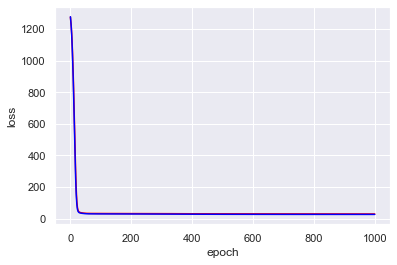

In [72]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout, Dense

#make model
lp2pen = .1
#nx = x_train.shape
nn1 = models.Sequential()
nn1.add(layers.Dense(units=100,activation='relu',input_shape=(X_train.shape[1],)))
#nn1.add(Dropout(0.2))
nn1.add(layers.Dense(units=1))

#compile model
nn1.compile(loss='mse',optimizer='adam',metrics=['mse'])

# fit
nhist = nn1.fit(X_train,y_train,epochs=1000,verbose=2,batch_size=1000,validation_data=(X_test,y_test))

### plot training by epoch
trL = nhist.history['loss']
teL = nhist.history['val_loss']
epind = range(1,len(trL)+1)
plt.plot(epind,trL,c='red')
plt.plot(epind,teL,c='blue')
plt.xlabel('epoch'); plt.ylabel('loss')

In [73]:
nn1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 100)               300       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


In [74]:
yhat_NN = nn1.predict(X_test)

print('r2 score is for NN model is ',r2_score(y_test,yhat_NN))
print('RMSE on the test for NN is ',mean_squared_error(y_test,yhat_NN))

r2 score is for NN model is  0.9206923027252895
RMSE on the test for NN is  25.891988329804327


## Conclusion

### r2 score

| Algorithm          | Mileage    | Mileage and year |
| ------------------ | -------    | --------         |
| Linear regression   | 0.637       | 0.832            | 
| decision tree       | 0.733       | 0.912            | 
| Random forest       | 0.612       | 0.876             | 
| Boosting            | 0.733       | 0.918
| Neural network      | 0.738       | 0.920             |  


* When using only Mileage, the decision tree, boosting and NN are the best models and they work well equally. Suprisingly the random forest method works worst that linear regression.
* Adding year to the list of features, obviously improves the accuracy. The Random forset methods improves significantly when consider two features. 
* Neural Network and boosting have the highest accuracy.
